In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
housing_data_path = "Austin_housing_data.csv"
census_path = "Census_data.csv"

# Read the housing data and census results
housing_data = pd.read_csv(housing_data_path)
census_results = pd.read_csv(census_path)


In [3]:
census_results.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [4]:
census_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 164 entries, SUMLEV to RNETMIG2019
dtypes: float64(54), int64(108), object(2)
memory usage: 4.0+ MB


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [6]:
housing_data.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [7]:
house_type= housing_data.homeType.value_counts()
house_type

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

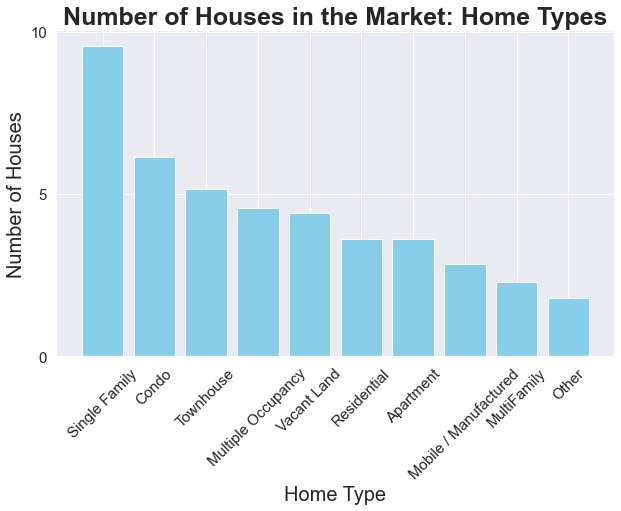

In [57]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))


plt.bar(house_type.index , np.log(house_type.values), color = "skyblue")
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel("Home Type", fontsize=20)
plt.title("Number of Houses in the Market: Home Types", fontweight="bold", fontsize=25)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


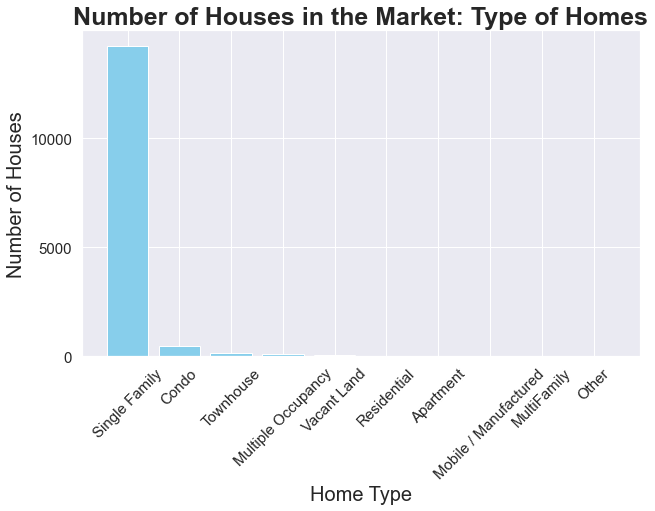

In [54]:
# making a bar graph for the types of home
plt.figure(figsize= (10,6))

plt.bar(house_type.index ,(house_type.values), color = "skyblue")
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel("Home Type", fontsize=20)
plt.title("Number of Houses in the Market: Type of Homes", fontweight="bold", fontsize=25)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [10]:
# based on the shape of the histogram, we can see majority of the data come from Single Family home.
# we will drop other types of home and only focus on Single Family homes.

mask = housing_data.homeType == "Single Family"
mask1 = housing_data[mask]
mask1

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg


In [11]:
year_sold= mask1.latest_saleyear.value_counts()
year_sold

2020    5055
2019    4992
2018    4118
2021      76
Name: latest_saleyear, dtype: int64

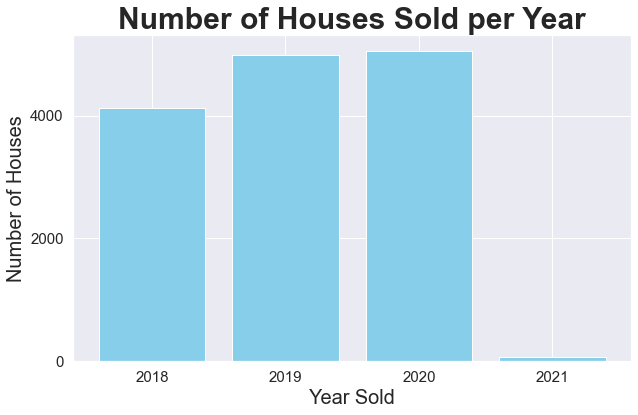

In [55]:
# making a bar graph for the year
plt.figure(figsize= (10,6))
plt.bar(year_sold.index ,(year_sold.values),color = "skyblue")
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel("Year Sold", fontsize=20)
plt.title("Number of Houses Sold per Year", fontweight="bold", fontsize=30)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
# based on the shape of the histogram for the year the house was sold, we have the least data from 2021. 
# Since 2021 has not been completed, this is our limitation for the incomplete data for 2021. We will remove 2021.


mask2 = mask1.latest_saleyear != 2021
mask3 = mask1[mask2]
mask3

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


In [14]:
mask3.latest_saleyear

0        2019
1        2020
2        2019
3        2018
4        2018
         ... 
15163    2020
15164    2020
15165    2020
15166    2020
15167    2020
Name: latest_saleyear, Length: 14165, dtype: int64

In [15]:
house_city= mask3.city.value_counts()
house_city

austin              14020
del valle              84
pflugerville           34
driftwood              12
manor                   5
dripping springs        4
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

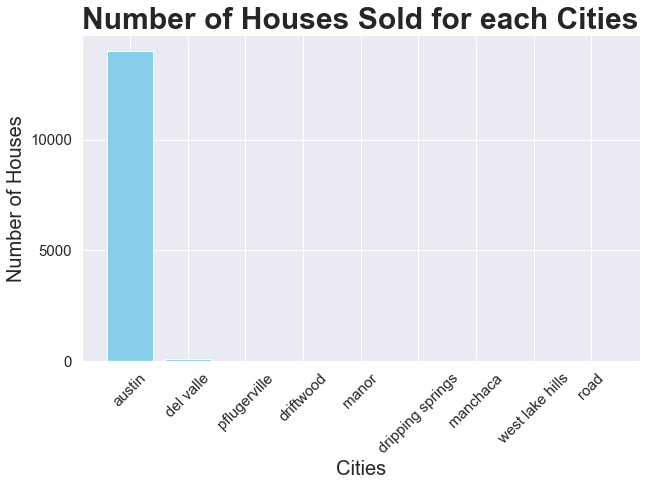

In [56]:
# making a bar graph for the cities
plt.figure(figsize= (10,6))
plt.bar(house_city.index ,(house_city.values), color = "skyblue")
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel("Cities", fontsize=20)
plt.title("Number of Houses Sold for each Cities", fontweight="bold", fontsize=30)
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
# we will only focus on Austin city

mask4 = mask3.city == "austin"
mask5 = mask3[mask4]
mask5

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,True,...,1,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,True,...,1,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,False,...,1,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,True,...,1,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
22,116080981,austin,14405 Laurinburg Dr,78717,Popular Bingham Floor plan in sought after Nor...,30.488775,-97.794899,2.21,2,True,...,1,1,3.300000,7.666667,1259,14,5.0,4,2,116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


In [18]:
# removing home with 27 bathrooms and 1508482800.0 sqft as outliers

mask = mask5.numOfBathrooms != 27.000000
mask6 = mask5[mask]
mask = mask6.lotSizeSqFt != 1508482800
cleaned_data = mask6[mask]
cleaned_data

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,True,...,1,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,True,...,1,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,False,...,1,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,True,...,1,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
22,116080981,austin,14405 Laurinburg Dr,78717,Popular Bingham Floor plan in sought after Nor...,30.488775,-97.794899,2.21,2,True,...,1,1,3.300000,7.666667,1259,14,5.0,4,2,116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


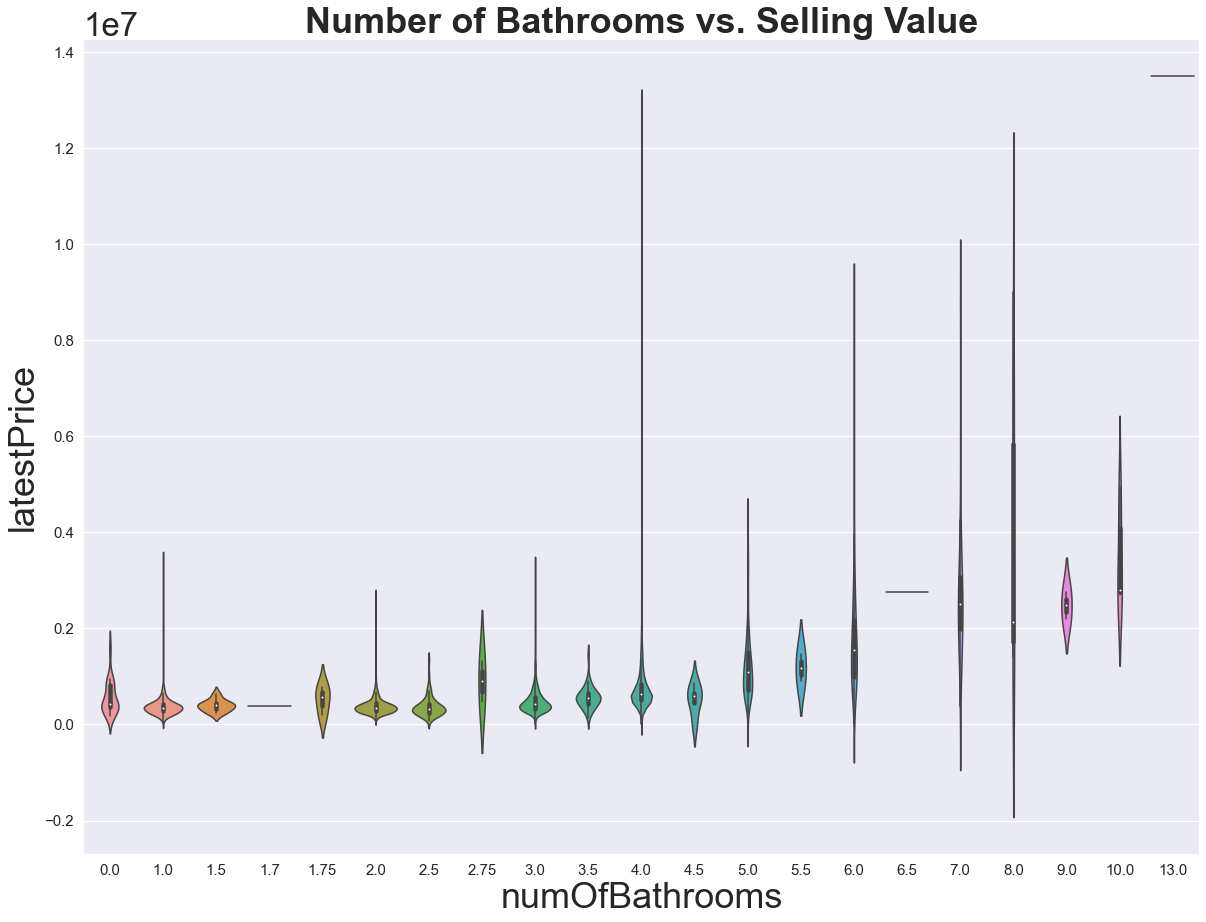

In [19]:
# lookin at each feature of the house to see if they are significant to the price

#looking at the distribution for bathrooms vs. price
plt.figure(figsize=(20,15))
sns.set(font_scale=3)


sns.violinplot(data = cleaned_data , x="numOfBathrooms", y=("latestPrice"))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Number of Bathrooms vs. Selling Value", fontweight="bold")

plt.show()

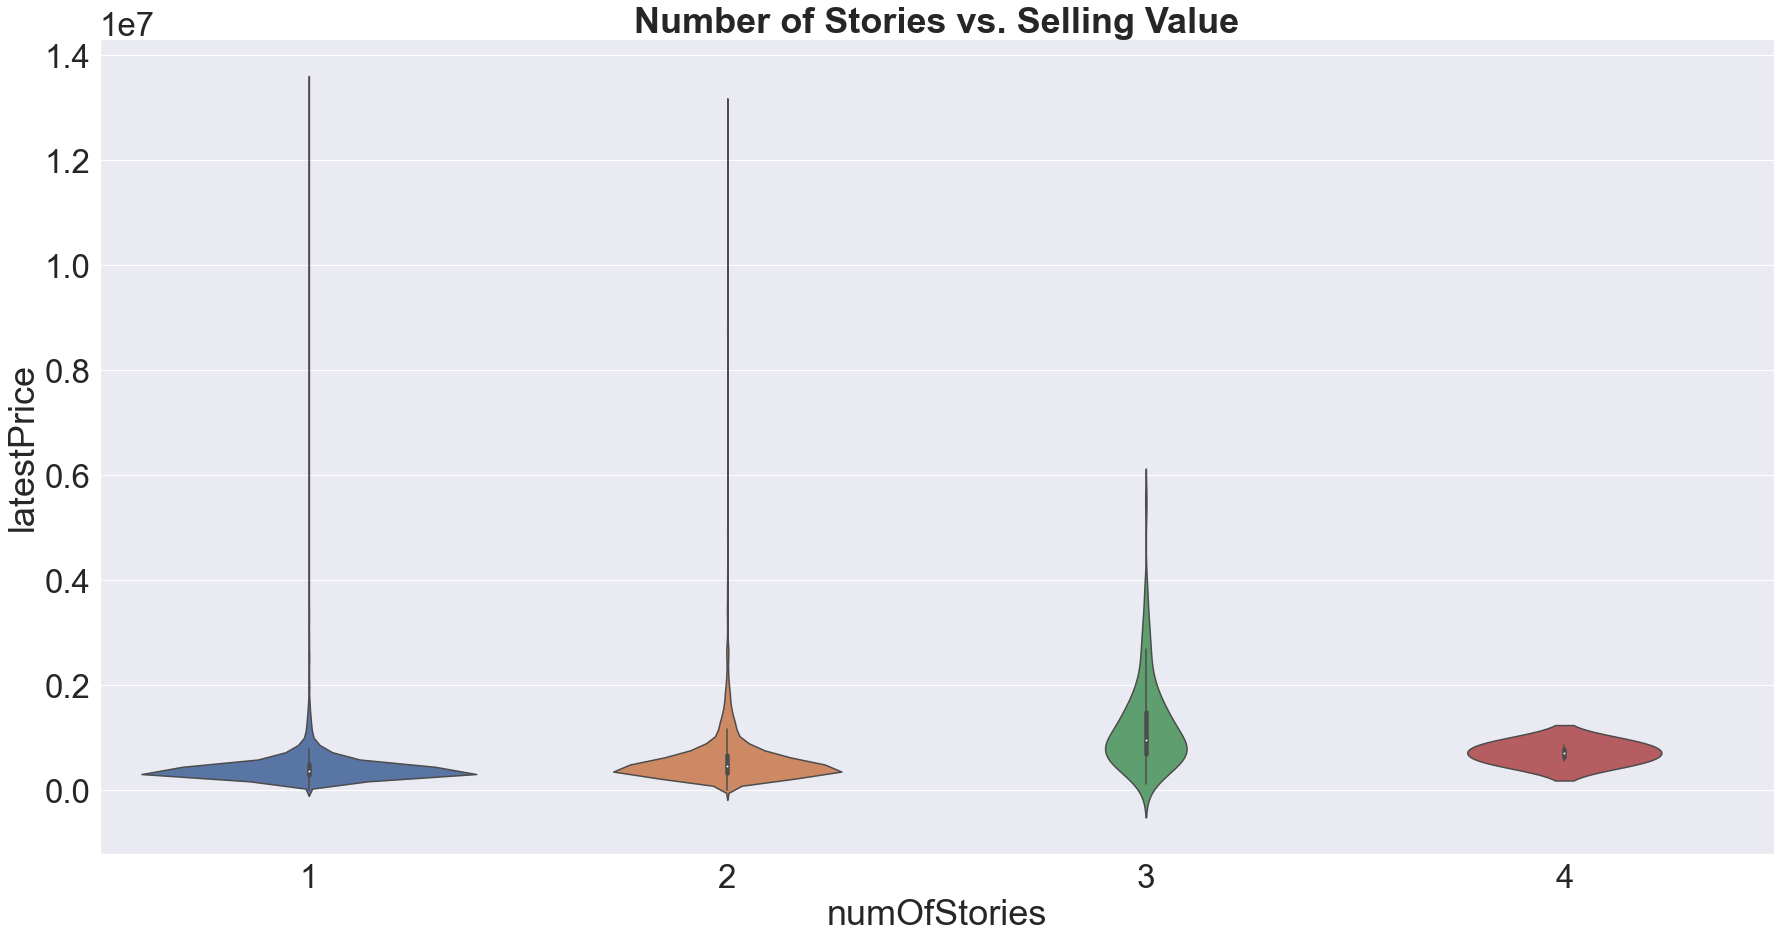

In [20]:
#looking at the distribution for stories vs. price
plt.figure(figsize=(30,15))
sns.set(font_scale=3)

sns.violinplot(data = cleaned_data , x="numOfStories", y=("latestPrice"),)
plt.title("Number of Stories vs. Selling Value", fontweight="bold")
plt.show()

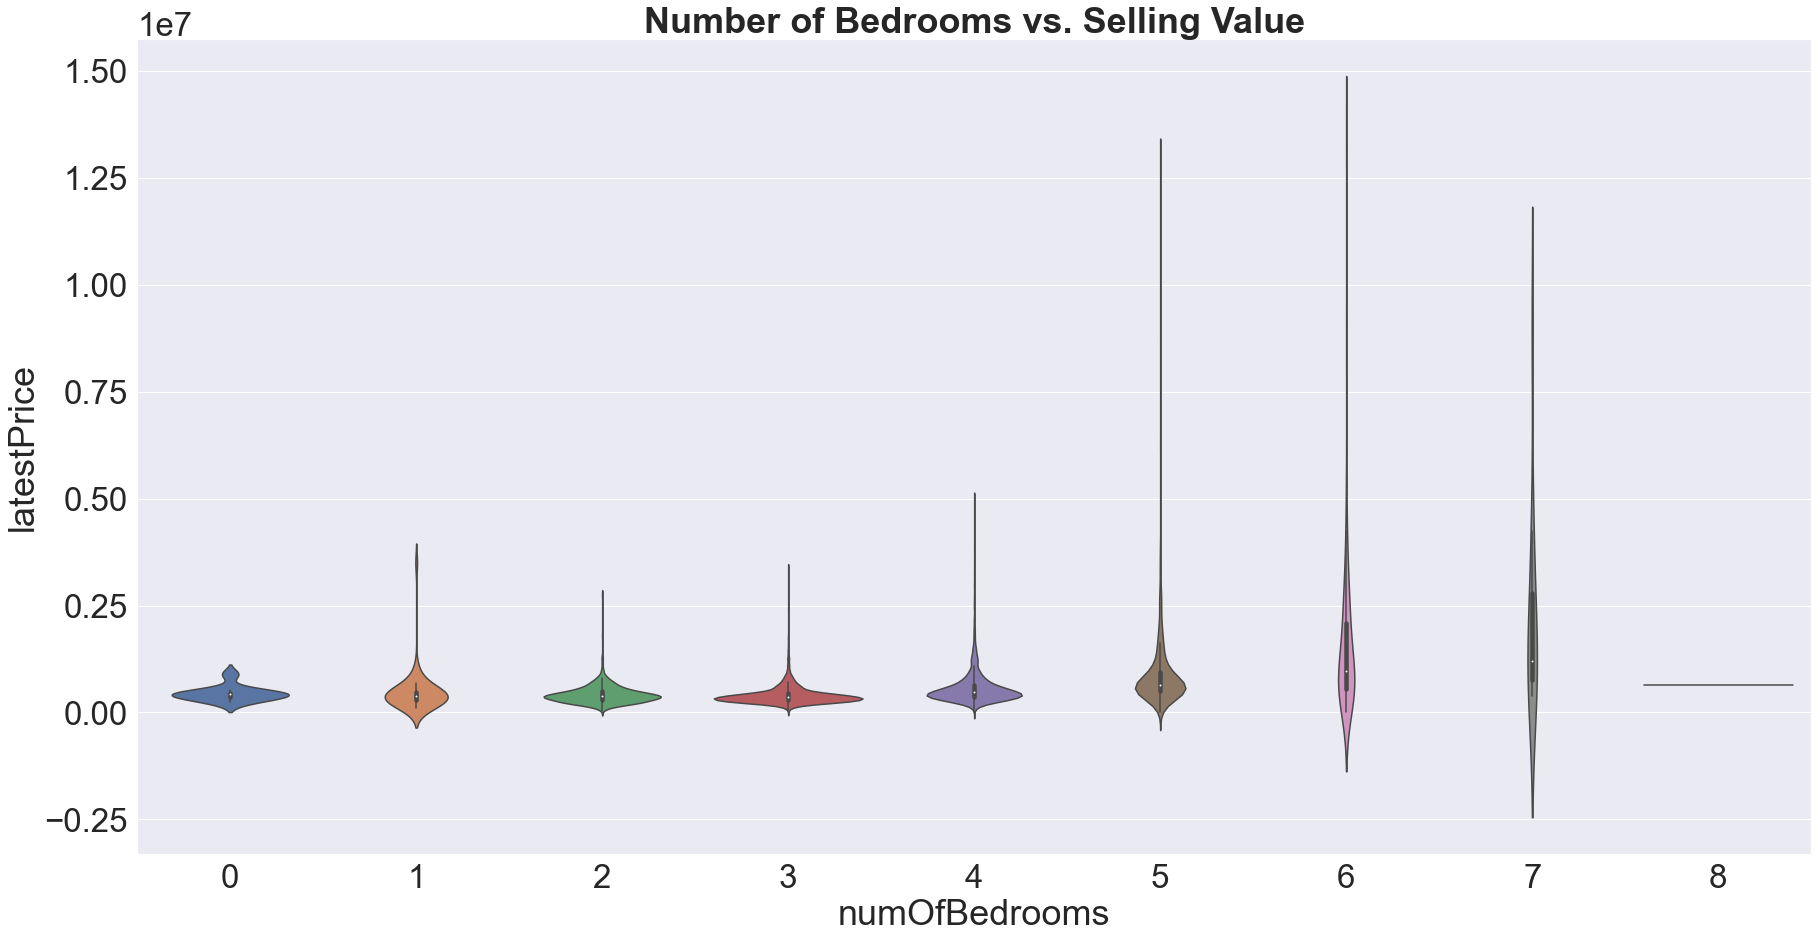

In [21]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)

sns.violinplot(data = cleaned_data , x="numOfBedrooms", y=("latestPrice"))
plt.title("Number of Bedrooms vs. Selling Value", fontweight="bold")
plt.show()

In [22]:
cleaned_data.lotSizeSqFt.mean()

15880.423783706543

In [23]:
# create bins for lot size to 4 groups

for indx, row in cleaned_data.iterrows():
    if row["lotSizeSqFt"] > 40560:
        print(f"{indx}: Greater than 1 Acre")
    elif row["lotSizeSqFt"] >= 32670:
        print(f"{indx}: 0.75 Acres to 1 Acre")
    elif row["lotSizeSqFt"] >= 21780:
        print(f"{indx}: 0.5 Acres to 0.75 Acres")
    elif row["lotSizeSqFt"] >= 10890:
        print(f"{indx}: 0.25 Acres to 0.5 Acres ")
    else:
        print(f"{indx}: Less than 0.25 Acres")

17: Less than 0.25 Acres
18: Less than 0.25 Acres
19: Less than 0.25 Acres
20: Less than 0.25 Acres
22: Less than 0.25 Acres
24: Less than 0.25 Acres
25: Less than 0.25 Acres
26: 0.25 Acres to 0.5 Acres 
27: Less than 0.25 Acres
28: 0.5 Acres to 0.75 Acres
29: Greater than 1 Acre
30: Less than 0.25 Acres
31: Less than 0.25 Acres
32: Less than 0.25 Acres
33: Greater than 1 Acre
34: 0.25 Acres to 0.5 Acres 
35: Less than 0.25 Acres
36: Less than 0.25 Acres
37: Greater than 1 Acre
38: Less than 0.25 Acres
39: 0.25 Acres to 0.5 Acres 
40: Less than 0.25 Acres
41: Greater than 1 Acre
42: Less than 0.25 Acres
43: Greater than 1 Acre
44: Less than 0.25 Acres
45: 0.25 Acres to 0.5 Acres 
46: Less than 0.25 Acres
47: Less than 0.25 Acres
48: Less than 0.25 Acres
49: Less than 0.25 Acres
50: Greater than 1 Acre
51: Greater than 1 Acre
52: Less than 0.25 Acres
53: Less than 0.25 Acres
54: Less than 0.25 Acres
55: Less than 0.25 Acres
56: Greater than 1 Acre
57: Less than 0.25 Acres
58: Less than 

1971: Less than 0.25 Acres
1972: 0.25 Acres to 0.5 Acres 
1973: Less than 0.25 Acres
1974: 0.25 Acres to 0.5 Acres 
1975: 0.25 Acres to 0.5 Acres 
1976: Less than 0.25 Acres
1977: Less than 0.25 Acres
1978: 0.25 Acres to 0.5 Acres 
1979: 0.25 Acres to 0.5 Acres 
1980: Less than 0.25 Acres
1981: Less than 0.25 Acres
1982: Less than 0.25 Acres
1983: 0.25 Acres to 0.5 Acres 
1984: Less than 0.25 Acres
1985: Less than 0.25 Acres
1986: 0.5 Acres to 0.75 Acres
1987: Less than 0.25 Acres
1988: Greater than 1 Acre
1989: 0.25 Acres to 0.5 Acres 
1990: Greater than 1 Acre
1991: Less than 0.25 Acres
1992: Greater than 1 Acre
1993: Less than 0.25 Acres
1994: Less than 0.25 Acres
1995: 0.5 Acres to 0.75 Acres
1996: Greater than 1 Acre
1997: Greater than 1 Acre
1998: 0.25 Acres to 0.5 Acres 
1999: 0.25 Acres to 0.5 Acres 
2000: 0.25 Acres to 0.5 Acres 
2001: 0.25 Acres to 0.5 Acres 
2003: Less than 0.25 Acres
2004: 0.25 Acres to 0.5 Acres 
2006: 0.25 Acres to 0.5 Acres 
2007: Greater than 1 Acre
200

3281: Less than 0.25 Acres
3282: Less than 0.25 Acres
3283: 0.5 Acres to 0.75 Acres
3284: 0.25 Acres to 0.5 Acres 
3285: 0.25 Acres to 0.5 Acres 
3286: Less than 0.25 Acres
3287: Less than 0.25 Acres
3288: 0.25 Acres to 0.5 Acres 
3289: Less than 0.25 Acres
3290: 0.25 Acres to 0.5 Acres 
3291: Less than 0.25 Acres
3292: Less than 0.25 Acres
3293: Less than 0.25 Acres
3294: Less than 0.25 Acres
3295: Less than 0.25 Acres
3296: Less than 0.25 Acres
3297: Less than 0.25 Acres
3298: Less than 0.25 Acres
3299: Less than 0.25 Acres
3300: Less than 0.25 Acres
3301: Less than 0.25 Acres
3302: Less than 0.25 Acres
3303: Less than 0.25 Acres
3304: Less than 0.25 Acres
3305: Less than 0.25 Acres
3306: Less than 0.25 Acres
3307: Less than 0.25 Acres
3308: Less than 0.25 Acres
3309: 0.25 Acres to 0.5 Acres 
3310: Less than 0.25 Acres
3311: Less than 0.25 Acres
3312: Less than 0.25 Acres
3313: Less than 0.25 Acres
3315: Less than 0.25 Acres
3316: 0.25 Acres to 0.5 Acres 
3317: Less than 0.25 Acres
3

4894: Less than 0.25 Acres
4895: Greater than 1 Acre
4896: 0.5 Acres to 0.75 Acres
4897: Less than 0.25 Acres
4898: 0.25 Acres to 0.5 Acres 
4899: Greater than 1 Acre
4900: Less than 0.25 Acres
4901: 0.25 Acres to 0.5 Acres 
4902: Greater than 1 Acre
4903: Less than 0.25 Acres
4904: 0.25 Acres to 0.5 Acres 
4905: 0.25 Acres to 0.5 Acres 
4907: Greater than 1 Acre
4908: 0.25 Acres to 0.5 Acres 
4910: Less than 0.25 Acres
4911: Less than 0.25 Acres
4912: Less than 0.25 Acres
4913: Greater than 1 Acre
4914: Greater than 1 Acre
4915: Less than 0.25 Acres
4916: 0.25 Acres to 0.5 Acres 
4917: 0.25 Acres to 0.5 Acres 
4918: Less than 0.25 Acres
4919: Greater than 1 Acre
4920: Greater than 1 Acre
4921: Greater than 1 Acre
4922: Less than 0.25 Acres
4923: Greater than 1 Acre
4924: Less than 0.25 Acres
4925: 0.25 Acres to 0.5 Acres 
4926: 0.25 Acres to 0.5 Acres 
4927: Less than 0.25 Acres
4928: Less than 0.25 Acres
4929: Greater than 1 Acre
4930: 0.25 Acres to 0.5 Acres 
4931: Less than 0.25 Ac

6348: Less than 0.25 Acres
6349: Less than 0.25 Acres
6350: 0.25 Acres to 0.5 Acres 
6352: Less than 0.25 Acres
6353: Less than 0.25 Acres
6354: Less than 0.25 Acres
6355: Less than 0.25 Acres
6356: Less than 0.25 Acres
6357: Less than 0.25 Acres
6358: Less than 0.25 Acres
6359: Less than 0.25 Acres
6360: 0.25 Acres to 0.5 Acres 
6361: Less than 0.25 Acres
6362: 0.25 Acres to 0.5 Acres 
6363: Less than 0.25 Acres
6364: Less than 0.25 Acres
6366: Less than 0.25 Acres
6367: 0.25 Acres to 0.5 Acres 
6368: Less than 0.25 Acres
6369: Less than 0.25 Acres
6370: Less than 0.25 Acres
6371: Less than 0.25 Acres
6372: Less than 0.25 Acres
6373: Less than 0.25 Acres
6374: Less than 0.25 Acres
6375: Less than 0.25 Acres
6376: Less than 0.25 Acres
6377: Less than 0.25 Acres
6378: Less than 0.25 Acres
6380: Less than 0.25 Acres
6381: Less than 0.25 Acres
6382: Less than 0.25 Acres
6383: Less than 0.25 Acres
6384: Less than 0.25 Acres
6385: Less than 0.25 Acres
6386: Less than 0.25 Acres
6387: 0.25 A

7908: 0.25 Acres to 0.5 Acres 
7909: Less than 0.25 Acres
7910: Less than 0.25 Acres
7911: Less than 0.25 Acres
7913: Less than 0.25 Acres
7914: Less than 0.25 Acres
7915: Less than 0.25 Acres
7916: Less than 0.25 Acres
7917: Less than 0.25 Acres
7918: Less than 0.25 Acres
7919: Less than 0.25 Acres
7920: Less than 0.25 Acres
7922: Less than 0.25 Acres
7923: Less than 0.25 Acres
7924: Less than 0.25 Acres
7926: Less than 0.25 Acres
7927: Less than 0.25 Acres
7930: 0.25 Acres to 0.5 Acres 
7932: Less than 0.25 Acres
7933: 0.25 Acres to 0.5 Acres 
7934: Less than 0.25 Acres
7935: 0.25 Acres to 0.5 Acres 
7936: Less than 0.25 Acres
7937: Less than 0.25 Acres
7938: Less than 0.25 Acres
7939: Less than 0.25 Acres
7940: Less than 0.25 Acres
7941: Less than 0.25 Acres
7942: Less than 0.25 Acres
7944: 0.25 Acres to 0.5 Acres 
7945: Less than 0.25 Acres
7946: Less than 0.25 Acres
7947: Less than 0.25 Acres
7948: 0.25 Acres to 0.5 Acres 
7949: Less than 0.25 Acres
7950: Less than 0.25 Acres
7951

9332: Less than 0.25 Acres
9334: Less than 0.25 Acres
9335: Less than 0.25 Acres
9336: 0.25 Acres to 0.5 Acres 
9337: Less than 0.25 Acres
9338: Less than 0.25 Acres
9339: Less than 0.25 Acres
9340: Less than 0.25 Acres
9341: Less than 0.25 Acres
9342: Less than 0.25 Acres
9343: Less than 0.25 Acres
9344: Less than 0.25 Acres
9345: Less than 0.25 Acres
9346: Less than 0.25 Acres
9347: Less than 0.25 Acres
9349: Less than 0.25 Acres
9351: Less than 0.25 Acres
9352: Less than 0.25 Acres
9353: Less than 0.25 Acres
9354: 0.25 Acres to 0.5 Acres 
9355: Less than 0.25 Acres
9358: Less than 0.25 Acres
9360: Less than 0.25 Acres
9361: Less than 0.25 Acres
9362: Less than 0.25 Acres
9363: Less than 0.25 Acres
9364: Less than 0.25 Acres
9365: Less than 0.25 Acres
9367: 0.25 Acres to 0.5 Acres 
9368: Less than 0.25 Acres
9369: Less than 0.25 Acres
9370: 0.25 Acres to 0.5 Acres 
9371: Less than 0.25 Acres
9372: Less than 0.25 Acres
9373: Less than 0.25 Acres
9374: Less than 0.25 Acres
9375: Less t

10722: Less than 0.25 Acres
10723: Less than 0.25 Acres
10724: Less than 0.25 Acres
10725: Less than 0.25 Acres
10726: Less than 0.25 Acres
10727: Less than 0.25 Acres
10728: Less than 0.25 Acres
10729: 0.25 Acres to 0.5 Acres 
10730: Less than 0.25 Acres
10731: Less than 0.25 Acres
10732: Less than 0.25 Acres
10734: Less than 0.25 Acres
10737: Less than 0.25 Acres
10738: Less than 0.25 Acres
10739: 0.25 Acres to 0.5 Acres 
10740: Less than 0.25 Acres
10741: Less than 0.25 Acres
10742: Less than 0.25 Acres
10743: Less than 0.25 Acres
10744: Less than 0.25 Acres
10745: Less than 0.25 Acres
10747: Less than 0.25 Acres
10748: Less than 0.25 Acres
10751: Less than 0.25 Acres
10752: Less than 0.25 Acres
10754: 0.25 Acres to 0.5 Acres 
10755: Less than 0.25 Acres
10758: Less than 0.25 Acres
10760: Less than 0.25 Acres
10762: Less than 0.25 Acres
10763: Less than 0.25 Acres
10764: Less than 0.25 Acres
10765: Less than 0.25 Acres
10766: Less than 0.25 Acres
10767: Less than 0.25 Acres
10768: L

12470: 0.25 Acres to 0.5 Acres 
12471: Less than 0.25 Acres
12472: Less than 0.25 Acres
12473: Less than 0.25 Acres
12474: Less than 0.25 Acres
12475: Less than 0.25 Acres
12476: Less than 0.25 Acres
12477: Less than 0.25 Acres
12478: Greater than 1 Acre
12479: 0.25 Acres to 0.5 Acres 
12480: 0.25 Acres to 0.5 Acres 
12481: Less than 0.25 Acres
12482: Less than 0.25 Acres
12483: 0.25 Acres to 0.5 Acres 
12484: Less than 0.25 Acres
12485: Less than 0.25 Acres
12486: Less than 0.25 Acres
12487: Less than 0.25 Acres
12488: Less than 0.25 Acres
12489: Less than 0.25 Acres
12490: 0.25 Acres to 0.5 Acres 
12491: 0.25 Acres to 0.5 Acres 
12492: Less than 0.25 Acres
12493: Less than 0.25 Acres
12494: Less than 0.25 Acres
12495: Less than 0.25 Acres
12496: Less than 0.25 Acres
12497: Less than 0.25 Acres
12498: 0.25 Acres to 0.5 Acres 
12499: 0.25 Acres to 0.5 Acres 
12500: 0.25 Acres to 0.5 Acres 
12501: 0.5 Acres to 0.75 Acres
12502: 0.5 Acres to 0.75 Acres
12503: Less than 0.25 Acres
12504: 

14083: Less than 0.25 Acres
14084: Less than 0.25 Acres
14085: Less than 0.25 Acres
14086: 0.25 Acres to 0.5 Acres 
14087: Less than 0.25 Acres
14088: Less than 0.25 Acres
14089: Less than 0.25 Acres
14090: Less than 0.25 Acres
14091: Less than 0.25 Acres
14092: Less than 0.25 Acres
14093: Less than 0.25 Acres
14094: Less than 0.25 Acres
14095: Less than 0.25 Acres
14096: Less than 0.25 Acres
14097: Less than 0.25 Acres
14098: Less than 0.25 Acres
14099: Less than 0.25 Acres
14100: 0.25 Acres to 0.5 Acres 
14101: Less than 0.25 Acres
14102: 0.25 Acres to 0.5 Acres 
14103: Less than 0.25 Acres
14104: Less than 0.25 Acres
14105: Less than 0.25 Acres
14106: Less than 0.25 Acres
14107: Less than 0.25 Acres
14108: Less than 0.25 Acres
14109: Less than 0.25 Acres
14110: Less than 0.25 Acres
14111: Less than 0.25 Acres
14112: 0.25 Acres to 0.5 Acres 
14113: Less than 0.25 Acres
14114: Less than 0.25 Acres
14115: Less than 0.25 Acres
14116: Less than 0.25 Acres
14117: 0.25 Acres to 0.5 Acres 


In [24]:
# creating bins

bins = [0,10890,21780,32670,40560,10000000]
group_names = ["Less than 0.25 Acres","0.25 Ac to 0.5 Ac","0.5 Ac to 0.75 Ac","0.75 Ac to 1 Ac","Greater than 1 Acre"]

cleaned_data["Lot Size Group"] = pd.cut(cleaned_data["lotSizeSqFt"], bins, labels=group_names, include_lowest=True)
cleaned_data

<ipython-input-24-c7d8267c8e08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Lot Size Group"] = pd.cut(cleaned_data["lotSizeSqFt"], bins, labels=group_names, include_lowest=True)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,Lot Size Group
17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,True,...,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...,Less than 0.25 Acres
18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,True,...,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg,Less than 0.25 Acres
19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,False,...,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg,Less than 0.25 Acres
20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,True,...,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...,Less than 0.25 Acres
22,116080981,austin,14405 Laurinburg Dr,78717,Popular Bingham Floor plan in sought after Nor...,30.488775,-97.794899,2.21,2,True,...,1,3.300000,7.666667,1259,14,5.0,4,2,116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...,Less than 0.25 Acres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...,Less than 0.25 Acres
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...,0.5 Ac to 0.75 Ac
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg,Less than 0.25 Acres
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg,Less than 0.25 Acres


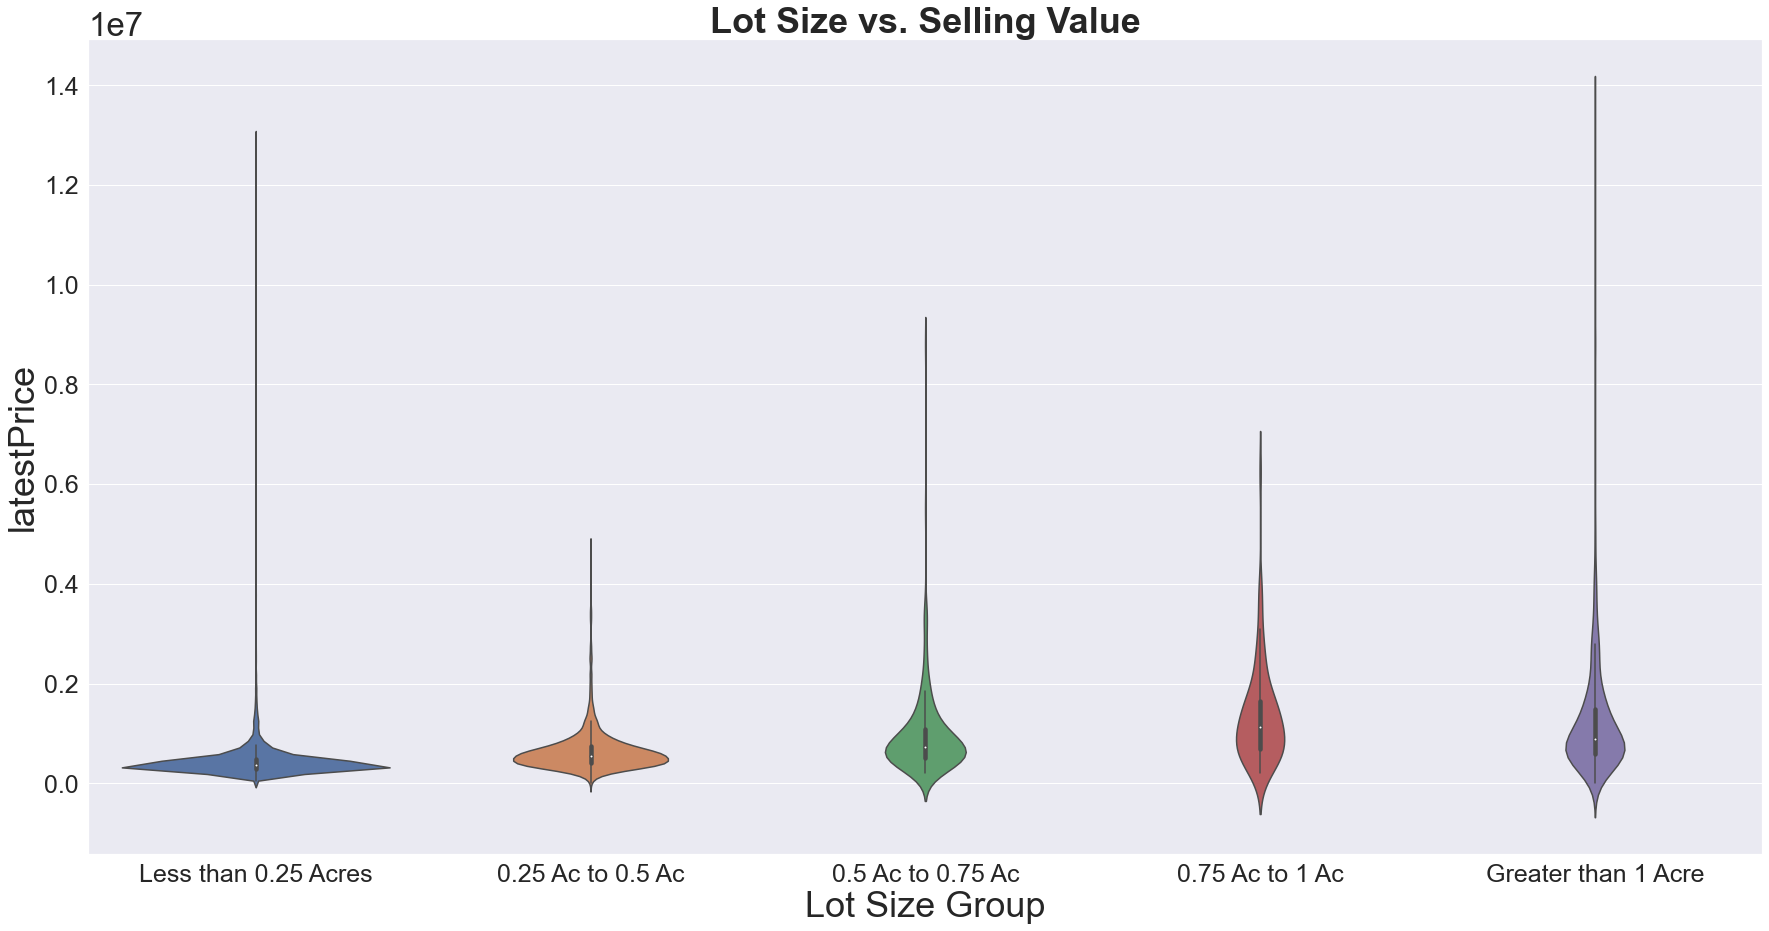

In [25]:
plt.figure(figsize=(30,15))

sns.violinplot(data = cleaned_data , x="Lot Size Group", y=("latestPrice"))
plt.title("Lot Size vs. Selling Value", fontweight="bold")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [26]:
cleaned_data.livingAreaSqFt.mean()

2237.5719788842916

In [27]:
# create bins for living area sqft to 4 groups

for indx, row in cleaned_data.iterrows():
    if row["livingAreaSqFt"] > 10000:
        print(f"{indx}: Greater than 10K sqft")
    elif row["livingAreaSqFt"] >= 3000:
        print(f"{indx}: 3K - 10K")
    elif row["livingAreaSqFt"] >= 1500:
        print(f"{indx}: 1.5K - 3K")
    else:
        print(f"{indx}: Less than 1.5K")

17: 3K - 10K
18: 3K - 10K
19: 1.5K - 3K
20: 1.5K - 3K
22: 3K - 10K
24: 1.5K - 3K
25: 1.5K - 3K
26: 1.5K - 3K
27: 1.5K - 3K
28: 3K - 10K
29: 1.5K - 3K
30: 1.5K - 3K
31: 3K - 10K
32: Less than 1.5K
33: Less than 1.5K
34: 3K - 10K
35: 1.5K - 3K
36: Less than 1.5K
37: 3K - 10K
38: 1.5K - 3K
39: 1.5K - 3K
40: 1.5K - 3K
41: 1.5K - 3K
42: 1.5K - 3K
43: 3K - 10K
44: 1.5K - 3K
45: 1.5K - 3K
46: Less than 1.5K
47: Less than 1.5K
48: Less than 1.5K
49: 1.5K - 3K
50: 3K - 10K
51: 1.5K - 3K
52: Less than 1.5K
53: 1.5K - 3K
54: 3K - 10K
55: 1.5K - 3K
56: 1.5K - 3K
57: 1.5K - 3K
58: 1.5K - 3K
59: 3K - 10K
60: 1.5K - 3K
61: Less than 1.5K
62: 1.5K - 3K
64: 1.5K - 3K
65: 3K - 10K
66: 3K - 10K
67: Less than 1.5K
68: Less than 1.5K
69: Less than 1.5K
70: 1.5K - 3K
71: 3K - 10K
72: 3K - 10K
73: 1.5K - 3K
75: Less than 1.5K
76: 3K - 10K
78: 3K - 10K
79: Less than 1.5K
80: 1.5K - 3K
81: 1.5K - 3K
82: 3K - 10K
83: 1.5K - 3K
84: 3K - 10K
86: 1.5K - 3K
87: 1.5K - 3K
88: 1.5K - 3K
89: 3K - 10K
91: 1.5K - 3K
92:

1963: 1.5K - 3K
1964: 3K - 10K
1965: 1.5K - 3K
1966: Less than 1.5K
1967: 1.5K - 3K
1968: 3K - 10K
1969: 3K - 10K
1970: 1.5K - 3K
1971: 3K - 10K
1972: 1.5K - 3K
1973: 3K - 10K
1974: 1.5K - 3K
1975: 3K - 10K
1976: 1.5K - 3K
1977: 1.5K - 3K
1978: 3K - 10K
1979: 3K - 10K
1980: 1.5K - 3K
1981: 1.5K - 3K
1982: 1.5K - 3K
1983: 3K - 10K
1984: 3K - 10K
1985: 1.5K - 3K
1986: 3K - 10K
1987: 1.5K - 3K
1988: 3K - 10K
1989: 3K - 10K
1990: 3K - 10K
1991: 1.5K - 3K
1992: 3K - 10K
1993: Less than 1.5K
1994: 3K - 10K
1995: 3K - 10K
1996: 3K - 10K
1997: 3K - 10K
1998: 1.5K - 3K
1999: 3K - 10K
2000: 1.5K - 3K
2001: 1.5K - 3K
2003: 1.5K - 3K
2004: 1.5K - 3K
2006: 3K - 10K
2007: 3K - 10K
2008: 1.5K - 3K
2009: 1.5K - 3K
2010: 1.5K - 3K
2011: Less than 1.5K
2012: 1.5K - 3K
2013: 1.5K - 3K
2014: 1.5K - 3K
2015: 1.5K - 3K
2016: 1.5K - 3K
2017: Less than 1.5K
2018: 1.5K - 3K
2020: 1.5K - 3K
2021: 1.5K - 3K
2022: Less than 1.5K
2023: Less than 1.5K
2024: Less than 1.5K
2025: 1.5K - 3K
2026: Less than 1.5K
2027: 

3499: Less than 1.5K
3500: Less than 1.5K
3501: 1.5K - 3K
3503: 1.5K - 3K
3505: Less than 1.5K
3506: Less than 1.5K
3507: 1.5K - 3K
3508: Less than 1.5K
3510: Less than 1.5K
3511: 1.5K - 3K
3512: Less than 1.5K
3513: 1.5K - 3K
3514: Less than 1.5K
3515: Less than 1.5K
3517: Less than 1.5K
3518: Less than 1.5K
3519: Less than 1.5K
3521: Less than 1.5K
3522: 1.5K - 3K
3523: 1.5K - 3K
3524: Less than 1.5K
3525: Less than 1.5K
3526: 1.5K - 3K
3527: Less than 1.5K
3528: 1.5K - 3K
3529: Less than 1.5K
3530: 1.5K - 3K
3532: Less than 1.5K
3533: 1.5K - 3K
3534: 1.5K - 3K
3535: 1.5K - 3K
3536: Less than 1.5K
3538: Less than 1.5K
3539: Less than 1.5K
3540: 1.5K - 3K
3541: Less than 1.5K
3543: 1.5K - 3K
3544: 1.5K - 3K
3545: Less than 1.5K
3546: Less than 1.5K
3547: 1.5K - 3K
3548: Less than 1.5K
3549: Less than 1.5K
3550: Less than 1.5K
3551: Less than 1.5K
3552: 1.5K - 3K
3553: 1.5K - 3K
3554: Less than 1.5K
3555: 1.5K - 3K
3556: Less than 1.5K
3557: 1.5K - 3K
3558: 1.5K - 3K
3559: 1.5K - 3K
35

5104: Less than 1.5K
5105: 1.5K - 3K
5106: Less than 1.5K
5107: 1.5K - 3K
5108: 1.5K - 3K
5109: 1.5K - 3K
5110: Less than 1.5K
5111: 1.5K - 3K
5112: 1.5K - 3K
5113: 1.5K - 3K
5114: 1.5K - 3K
5115: 1.5K - 3K
5116: 1.5K - 3K
5117: Less than 1.5K
5118: 1.5K - 3K
5119: Less than 1.5K
5120: 1.5K - 3K
5121: 1.5K - 3K
5122: 1.5K - 3K
5123: Less than 1.5K
5124: 1.5K - 3K
5125: Less than 1.5K
5126: Less than 1.5K
5127: Less than 1.5K
5128: Less than 1.5K
5129: 1.5K - 3K
5130: 1.5K - 3K
5131: Less than 1.5K
5132: 1.5K - 3K
5133: Less than 1.5K
5134: 1.5K - 3K
5135: Less than 1.5K
5136: 1.5K - 3K
5137: 1.5K - 3K
5138: 1.5K - 3K
5139: Less than 1.5K
5140: 1.5K - 3K
5141: Less than 1.5K
5142: 1.5K - 3K
5143: 1.5K - 3K
5144: 1.5K - 3K
5145: 3K - 10K
5146: 3K - 10K
5147: 1.5K - 3K
5148: 1.5K - 3K
5149: 1.5K - 3K
5151: 1.5K - 3K
5152: 1.5K - 3K
5153: Less than 1.5K
5154: 1.5K - 3K
5155: 1.5K - 3K
5156: 1.5K - 3K
5157: 1.5K - 3K
5158: Less than 1.5K
5159: 1.5K - 3K
5160: 3K - 10K
5161: 1.5K - 3K
5162: 

6688: 1.5K - 3K
6689: Less than 1.5K
6690: Less than 1.5K
6691: 1.5K - 3K
6692: Less than 1.5K
6693: 1.5K - 3K
6694: 1.5K - 3K
6695: Less than 1.5K
6696: 1.5K - 3K
6697: Less than 1.5K
6698: 1.5K - 3K
6699: Less than 1.5K
6700: Less than 1.5K
6701: 1.5K - 3K
6702: Less than 1.5K
6703: 1.5K - 3K
6705: 1.5K - 3K
6706: Less than 1.5K
6707: 1.5K - 3K
6708: Less than 1.5K
6709: Less than 1.5K
6710: 1.5K - 3K
6711: 1.5K - 3K
6712: 1.5K - 3K
6713: Less than 1.5K
6714: Less than 1.5K
6715: 1.5K - 3K
6716: Less than 1.5K
6717: 3K - 10K
6718: 1.5K - 3K
6719: 1.5K - 3K
6720: 1.5K - 3K
6721: Less than 1.5K
6723: Less than 1.5K
6724: Less than 1.5K
6725: Less than 1.5K
6726: Less than 1.5K
6727: Less than 1.5K
6728: 1.5K - 3K
6729: 1.5K - 3K
6730: 1.5K - 3K
6731: 1.5K - 3K
6732: 1.5K - 3K
6733: 1.5K - 3K
6734: Less than 1.5K
6735: 1.5K - 3K
6736: Less than 1.5K
6737: Less than 1.5K
6738: 1.5K - 3K
6739: 1.5K - 3K
6740: 1.5K - 3K
6741: 1.5K - 3K
6742: 1.5K - 3K
6743: Less than 1.5K
6744: Less than 1

8304: 3K - 10K
8305: 1.5K - 3K
8306: 1.5K - 3K
8307: 1.5K - 3K
8308: 3K - 10K
8309: 3K - 10K
8310: 3K - 10K
8311: 1.5K - 3K
8312: 1.5K - 3K
8313: 3K - 10K
8314: 1.5K - 3K
8315: 1.5K - 3K
8316: 1.5K - 3K
8317: 1.5K - 3K
8318: 1.5K - 3K
8319: 1.5K - 3K
8320: 1.5K - 3K
8321: 1.5K - 3K
8322: 3K - 10K
8323: 3K - 10K
8324: 1.5K - 3K
8325: 3K - 10K
8326: 3K - 10K
8327: 3K - 10K
8328: 3K - 10K
8329: 3K - 10K
8330: 1.5K - 3K
8331: 1.5K - 3K
8332: 1.5K - 3K
8333: 1.5K - 3K
8334: 1.5K - 3K
8335: 3K - 10K
8336: 3K - 10K
8337: 3K - 10K
8338: 3K - 10K
8339: 3K - 10K
8340: 1.5K - 3K
8341: 1.5K - 3K
8342: 1.5K - 3K
8343: 3K - 10K
8344: 1.5K - 3K
8345: 1.5K - 3K
8346: 1.5K - 3K
8347: 3K - 10K
8348: 3K - 10K
8349: 3K - 10K
8350: 1.5K - 3K
8351: 3K - 10K
8352: 1.5K - 3K
8353: 1.5K - 3K
8354: 3K - 10K
8355: 3K - 10K
8356: 1.5K - 3K
8357: 3K - 10K
8358: 1.5K - 3K
8359: 3K - 10K
8360: 3K - 10K
8361: 1.5K - 3K
8362: 1.5K - 3K
8363: 1.5K - 3K
8364: 3K - 10K
8365: 1.5K - 3K
8366: 3K - 10K
8367: 3K - 10K
8368: 

9939: 1.5K - 3K
9940: Less than 1.5K
9942: Less than 1.5K
9943: Less than 1.5K
9944: 1.5K - 3K
9945: Less than 1.5K
9946: Less than 1.5K
9947: Less than 1.5K
9948: Less than 1.5K
9949: Less than 1.5K
9950: Less than 1.5K
9951: Less than 1.5K
9952: 1.5K - 3K
9953: Less than 1.5K
9954: 1.5K - 3K
9955: Less than 1.5K
9956: Less than 1.5K
9957: Less than 1.5K
9958: 1.5K - 3K
9959: Less than 1.5K
9960: Less than 1.5K
9962: Less than 1.5K
9963: 1.5K - 3K
9964: Less than 1.5K
9965: Less than 1.5K
9966: Less than 1.5K
9967: 1.5K - 3K
9968: Less than 1.5K
9969: Less than 1.5K
9970: Less than 1.5K
9971: 1.5K - 3K
9972: Less than 1.5K
9973: Less than 1.5K
9974: Less than 1.5K
9975: Less than 1.5K
9976: 1.5K - 3K
9977: Less than 1.5K
9978: Less than 1.5K
9979: 1.5K - 3K
9981: 1.5K - 3K
9982: Less than 1.5K
9983: 1.5K - 3K
9984: Less than 1.5K
9985: Less than 1.5K
9986: Less than 1.5K
9987: 1.5K - 3K
9990: 1.5K - 3K
9991: Less than 1.5K
9992: Less than 1.5K
9993: Less than 1.5K
9994: Less than 1.5K

11340: 1.5K - 3K
11344: 1.5K - 3K
11345: Less than 1.5K
11346: Less than 1.5K
11347: 1.5K - 3K
11348: 1.5K - 3K
11349: 1.5K - 3K
11350: Less than 1.5K
11351: 1.5K - 3K
11352: Less than 1.5K
11354: 1.5K - 3K
11355: 1.5K - 3K
11356: 1.5K - 3K
11357: 1.5K - 3K
11358: 1.5K - 3K
11359: 1.5K - 3K
11360: 1.5K - 3K
11361: 1.5K - 3K
11362: 1.5K - 3K
11363: 1.5K - 3K
11364: 1.5K - 3K
11365: 1.5K - 3K
11366: 1.5K - 3K
11367: 1.5K - 3K
11370: 1.5K - 3K
11371: 1.5K - 3K
11372: 1.5K - 3K
11373: 1.5K - 3K
11374: 1.5K - 3K
11375: 1.5K - 3K
11376: 1.5K - 3K
11377: Less than 1.5K
11379: 1.5K - 3K
11380: 1.5K - 3K
11382: 1.5K - 3K
11383: 1.5K - 3K
11384: Less than 1.5K
11385: 1.5K - 3K
11386: Less than 1.5K
11387: 1.5K - 3K
11388: Less than 1.5K
11389: 1.5K - 3K
11390: 1.5K - 3K
11391: Less than 1.5K
11392: Less than 1.5K
11393: Less than 1.5K
11394: 1.5K - 3K
11395: 1.5K - 3K
11396: 1.5K - 3K
11397: 1.5K - 3K
11398: 1.5K - 3K
11399: Less than 1.5K
11400: 1.5K - 3K
11402: 1.5K - 3K
11404: 1.5K - 3K
11405

13176: 1.5K - 3K
13177: 3K - 10K
13178: 1.5K - 3K
13179: 1.5K - 3K
13180: Less than 1.5K
13181: 1.5K - 3K
13182: Less than 1.5K
13183: 1.5K - 3K
13184: 1.5K - 3K
13185: 1.5K - 3K
13186: Less than 1.5K
13187: 3K - 10K
13188: 1.5K - 3K
13189: 1.5K - 3K
13190: 1.5K - 3K
13191: Less than 1.5K
13192: 1.5K - 3K
13193: 3K - 10K
13194: 1.5K - 3K
13196: 1.5K - 3K
13197: Less than 1.5K
13198: 1.5K - 3K
13199: 1.5K - 3K
13200: 1.5K - 3K
13201: 1.5K - 3K
13203: 1.5K - 3K
13204: 1.5K - 3K
13205: 3K - 10K
13206: Less than 1.5K
13207: 3K - 10K
13208: 1.5K - 3K
13209: 3K - 10K
13210: 3K - 10K
13211: 1.5K - 3K
13212: 3K - 10K
13213: 1.5K - 3K
13214: 1.5K - 3K
13215: 1.5K - 3K
13216: 1.5K - 3K
13217: 1.5K - 3K
13218: 1.5K - 3K
13219: 1.5K - 3K
13220: 1.5K - 3K
13221: 1.5K - 3K
13222: 1.5K - 3K
13223: 1.5K - 3K
13224: 1.5K - 3K
13226: Less than 1.5K
13227: 1.5K - 3K
13228: 1.5K - 3K
13229: 3K - 10K
13230: Less than 1.5K
13231: Less than 1.5K
13232: Less than 1.5K
13233: 3K - 10K
13234: 1.5K - 3K
13236: 3

14880: 1.5K - 3K
14881: 1.5K - 3K
14882: Less than 1.5K
14883: 1.5K - 3K
14884: 1.5K - 3K
14885: 1.5K - 3K
14886: 1.5K - 3K
14887: 1.5K - 3K
14888: Less than 1.5K
14889: 1.5K - 3K
14890: Less than 1.5K
14892: 1.5K - 3K
14893: 1.5K - 3K
14894: 1.5K - 3K
14895: Less than 1.5K
14896: 1.5K - 3K
14897: 1.5K - 3K
14898: Less than 1.5K
14899: Less than 1.5K
14900: Less than 1.5K
14901: Less than 1.5K
14902: 1.5K - 3K
14903: 1.5K - 3K
14904: 1.5K - 3K
14905: Less than 1.5K
14906: 1.5K - 3K
14907: Less than 1.5K
14908: 1.5K - 3K
14909: Less than 1.5K
14911: 1.5K - 3K
14912: 1.5K - 3K
14913: 1.5K - 3K
14914: Less than 1.5K
14915: 1.5K - 3K
14916: Less than 1.5K
14917: 1.5K - 3K
14918: 1.5K - 3K
14919: Less than 1.5K
14920: 1.5K - 3K
14921: 1.5K - 3K
14923: Less than 1.5K
14924: Less than 1.5K
14925: Less than 1.5K
14926: 1.5K - 3K
14927: Less than 1.5K
14928: 1.5K - 3K
14929: 1.5K - 3K
14930: Less than 1.5K
14931: Less than 1.5K
14932: Less than 1.5K
14933: 1.5K - 3K
14934: Less than 1.5K
14935:

In [28]:
# creating bins

bins = [0,1499.9,2999.9,9999.9,110000]
group_names = ["Less than 1.5K","1.5K - 3K","3K - 10K","Greater than 10K sqft"]

cleaned_data["Living Area sqft Group"] = pd.cut(cleaned_data["livingAreaSqFt"], bins, labels=group_names, include_lowest=True)
cleaned_data


<ipython-input-28-2ee4a7507acb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Living Area sqft Group"] = pd.cut(cleaned_data["livingAreaSqFt"], bins, labels=group_names, include_lowest=True)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,Lot Size Group,Living Area sqft Group
17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,True,...,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...,Less than 0.25 Acres,3K - 10K
18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,True,...,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg,Less than 0.25 Acres,3K - 10K
19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,False,...,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg,Less than 0.25 Acres,1.5K - 3K
20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,True,...,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...,Less than 0.25 Acres,1.5K - 3K
22,116080981,austin,14405 Laurinburg Dr,78717,Popular Bingham Floor plan in sought after Nor...,30.488775,-97.794899,2.21,2,True,...,3.300000,7.666667,1259,14,5.0,4,2,116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...,Less than 0.25 Acres,3K - 10K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...,Less than 0.25 Acres,Less than 1.5K
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...,0.5 Ac to 0.75 Ac,3K - 10K
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg,Less than 0.25 Acres,Less than 1.5K
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg,Less than 0.25 Acres,Less than 1.5K


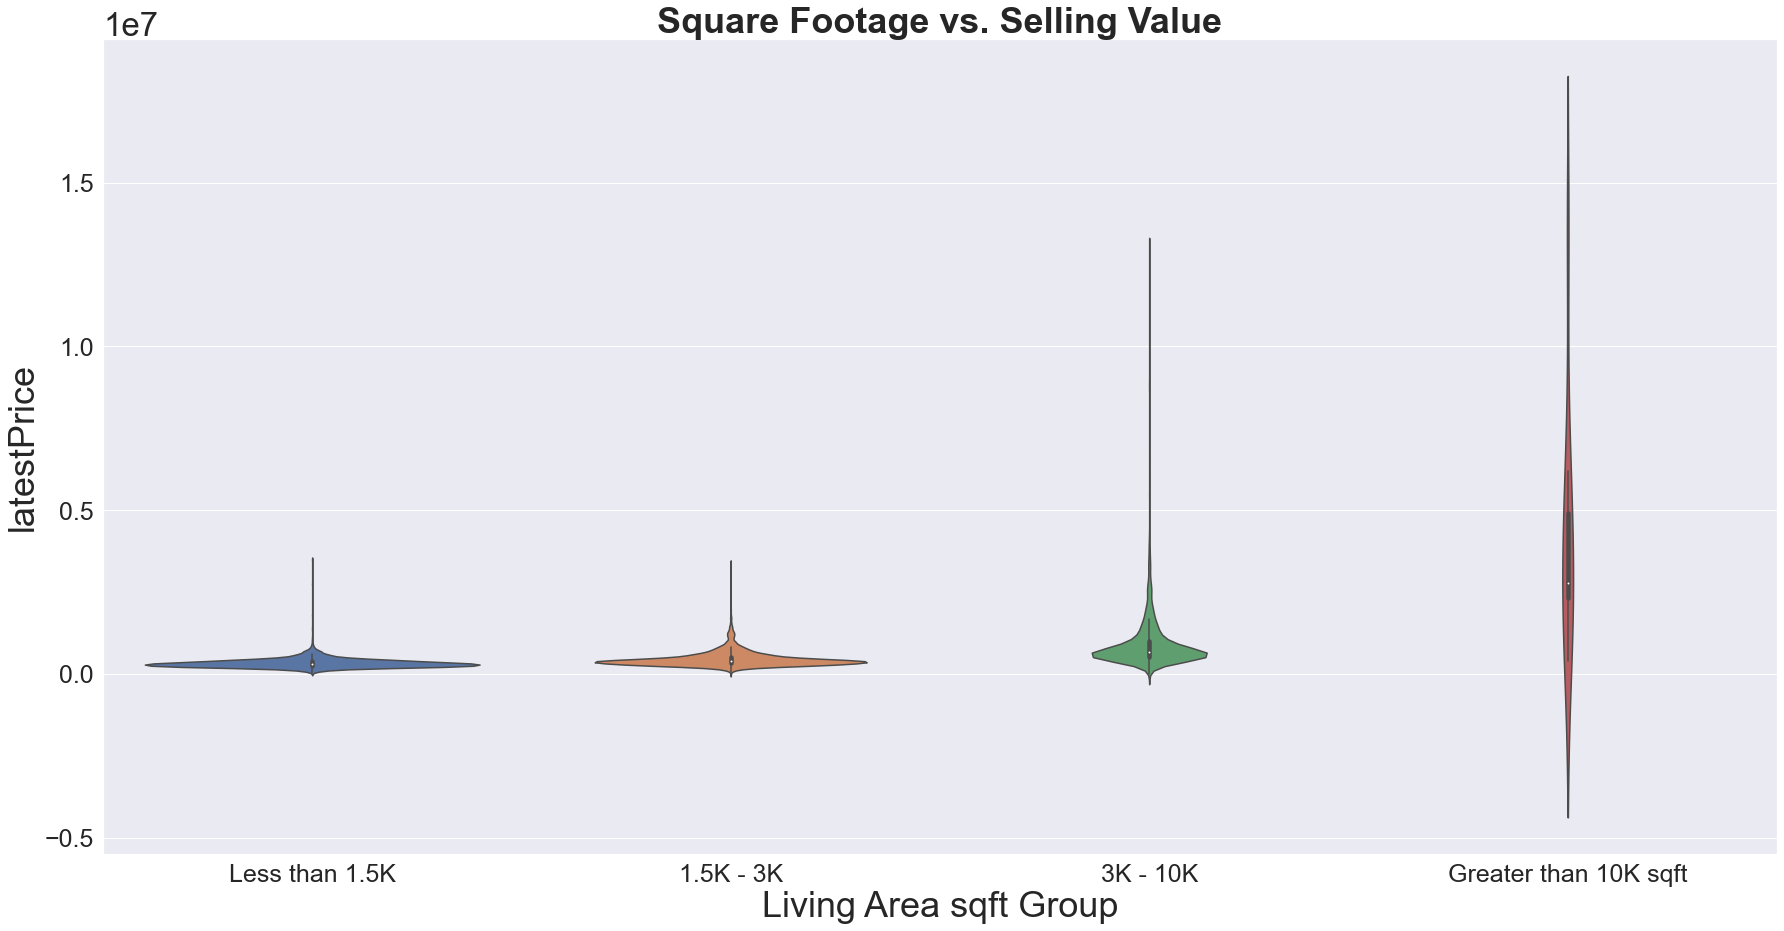

In [29]:
plt.figure(figsize=(30,15))

sns.violinplot(data = cleaned_data , x="Living Area sqft Group", y=("latestPrice"))
plt.title("Square Footage vs. Selling Value", fontweight="bold")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


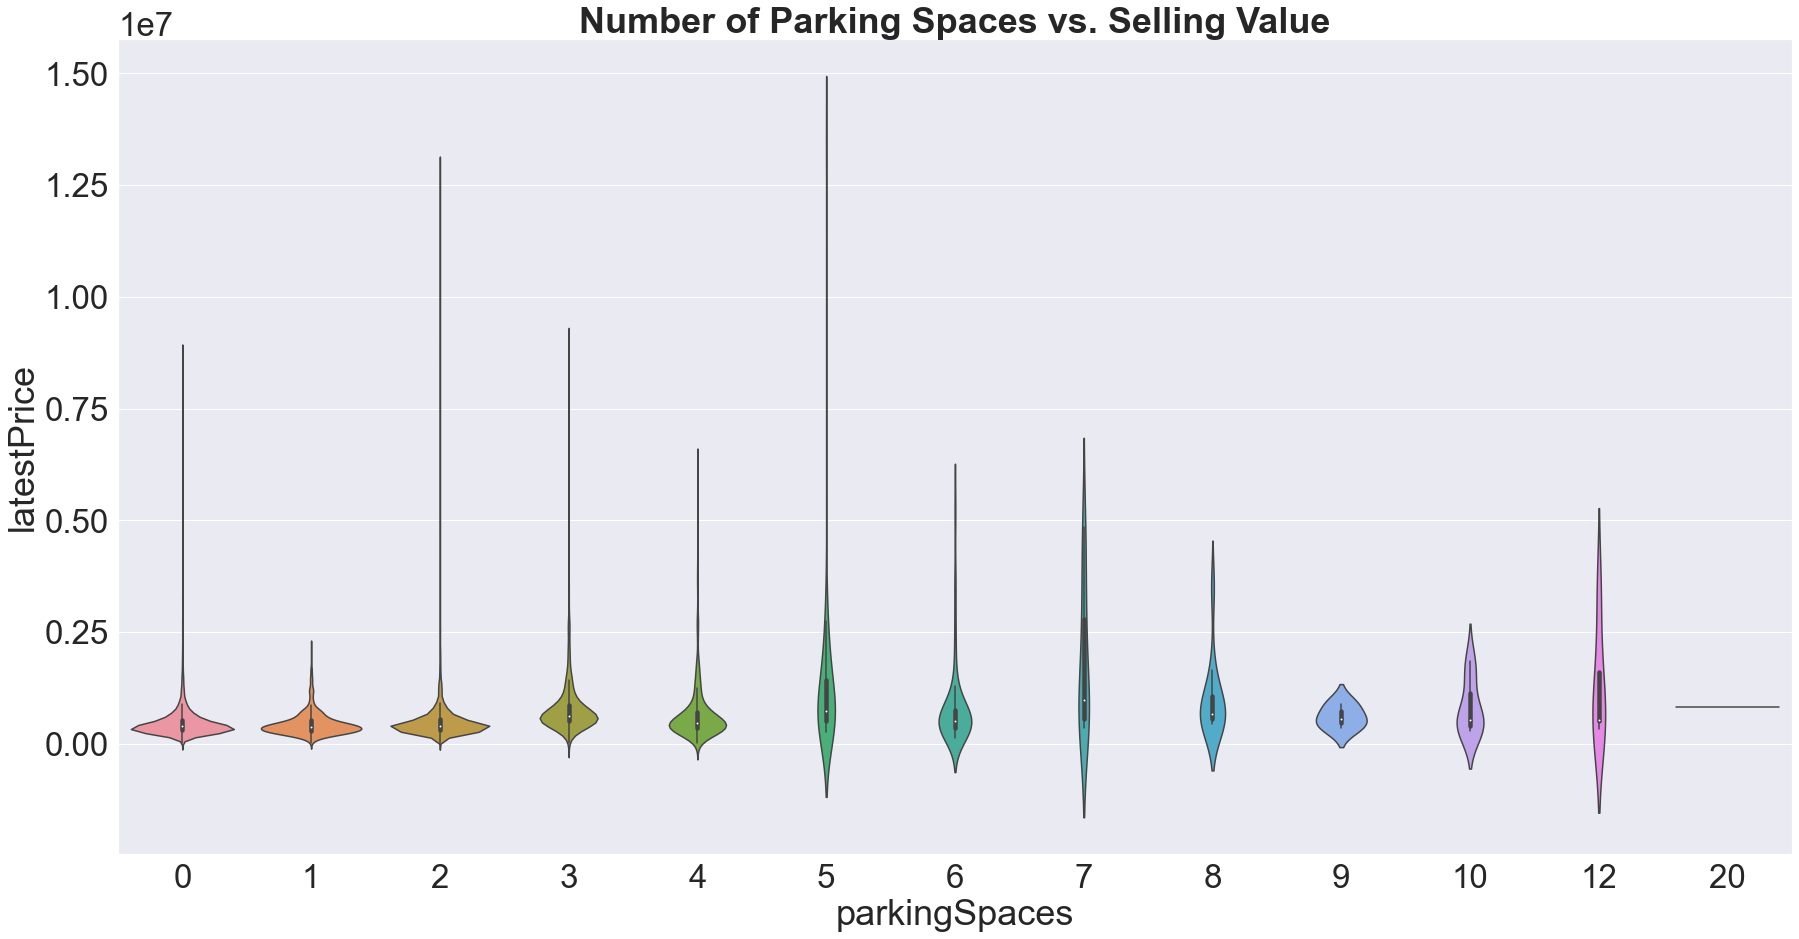

In [30]:
plt.figure(figsize=(30,15))

sns.violinplot(data = cleaned_data , x="parkingSpaces", y=("latestPrice"))
plt.title("Number of Parking Spaces vs. Selling Value", fontweight="bold")
plt.show()

In [31]:
# separating austin into 4 sections:
# northeast
# northweast
# southwest
# southeast

#identifying NE area
mask = cleaned_data["longitude"] >= -97.781485
loc_east = cleaned_data[mask]
mask = loc_east["latitude"] >= 30.292343
north_east = loc_east[mask]
north_east.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,4.905000e+03,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4.905000e+03,4905.000000,...,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,6.933111e+07,78740.101937,30.378872,-97.715510,2.009776,1.148420,1.147197,1980.134760,4.863624e+05,3.002446,...,0.024873,0.994495,1.070133,1.593510,5.666808,1195.395719,14.584098,2.482406,3.384913,1.376962
std,2.312495e+08,17.097546,0.057450,0.042811,0.077221,1.255165,1.255309,21.302662,4.254454e+05,2.520470,...,0.218890,0.073996,0.278320,0.835372,1.633618,271.461453,1.539552,0.856466,0.732780,0.499591
min,2.933355e+07,78653.000000,30.292381,-97.781471,1.980000,0.000000,0.000000,1909.000000,6.800000e+03,1.000000,...,0.000000,0.000000,0.000000,0.366667,2.333333,569.000000,11.000000,0.000000,0.000000,1.000000
25%,2.940685e+07,78727.000000,30.332977,-97.752678,1.980000,0.000000,0.000000,1964.000000,3.000000e+05,1.000000,...,0.000000,1.000000,1.000000,0.966667,4.333333,1028.000000,14.000000,2.000000,3.000000,1.000000
50%,2.942989e+07,78751.000000,30.367472,-97.721306,1.980000,1.000000,1.000000,1980.000000,3.990000e+05,2.000000,...,0.000000,1.000000,1.000000,1.366667,5.666667,1177.000000,15.000000,2.000000,3.000000,1.000000
75%,2.959635e+07,78757.000000,30.422592,-97.684151,1.980000,2.000000,2.000000,1997.000000,5.480000e+05,4.000000,...,0.000000,1.000000,1.000000,2.066667,7.000000,1474.000000,16.000000,3.000000,4.000000,2.000000
max,2.145191e+09,78759.000000,30.517174,-97.578438,2.210000,12.000000,12.000000,2020.000000,1.300000e+07,22.000000,...,2.000000,1.000000,2.000000,4.400000,9.000000,1913.000000,17.000000,8.000000,8.000000,4.000000


In [32]:
#identifying SW area
mask = cleaned_data["longitude"] < -97.781485
loc_west = cleaned_data[mask]
mask = loc_west["latitude"] < 30.292343
south_west = loc_west[mask]
south_west.describe()


,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,4.595000e+03,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4.595000e+03,4595.000000,...,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000
mean,9.928012e+07,78743.059195,30.196925,-97.859128,1.983499,1.275952,1.275517,1994.359521,4.633485e+05,2.986942,...,0.017628,1.033732,0.900544,2.003947,5.975941,1315.369097,15.578672,2.778836,3.553645,1.469641
std,2.943115e+08,7.142097,0.030645,0.057994,0.009631,1.431812,1.431896,14.977868,3.088316e+05,2.357900,...,0.131609,0.189959,0.299306,1.297561,1.840484,340.977677,1.675862,0.953741,0.708418,0.505631
min,2.858495e+07,78652.000000,30.129955,-98.022057,1.980000,0.000000,0.000000,1907.000000,8.000000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,3.333333,678.000000,12.000000,0.000000,0.000000,1.000000
25%,2.949197e+07,78739.000000,30.175246,-97.889164,1.980000,0.000000,0.000000,1982.000000,3.227000e+05,1.000000,...,0.000000,1.000000,1.000000,1.166667,4.000000,925.000000,14.000000,2.000000,3.000000,1.000000
50%,2.951212e+07,78745.000000,30.194565,-97.847969,1.980000,2.000000,2.000000,1997.000000,3.990000e+05,2.000000,...,0.000000,1.000000,1.000000,1.533333,6.000000,1450.000000,16.000000,3.000000,3.000000,1.000000
75%,7.034319e+07,78748.000000,30.214167,-97.813946,1.980000,2.000000,2.000000,2006.000000,5.000000e+05,4.000000,...,0.000000,1.000000,1.000000,2.300000,7.333333,1633.000000,17.000000,3.000000,4.000000,2.000000
max,2.131624e+09,78749.000000,30.289963,-97.781502,2.010000,20.000000,20.000000,2020.000000,4.850000e+06,18.000000,...,1.000000,3.000000,1.000000,7.700000,9.500000,1755.000000,19.000000,10.000000,7.000000,3.000000


In [33]:
#identifying SE area
mask = cleaned_data["longitude"] >= -97.781485
loc_east = cleaned_data[mask]
mask = loc_east["latitude"] < 30.292343
south_east = loc_east[mask]
south_east.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,2.626000e+03,2626.000000,2626.000000,2626.000000,2.626000e+03,2626.000000,2626.000000,2626.000000,2.626000e+03,2626.000000,...,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,1.429629e+08,78724.017136,30.231359,-97.721420,1.980000e+00,1.083016,1.083016,1985.886900,4.888650e+05,2.979056,...,0.009520,0.997334,1.031607,1.779221,4.355973,1058.988576,13.478675,2.372620,3.137471,1.388804
std,3.988609e+08,18.005800,0.044911,0.049036,7.950711e-14,1.190742,1.190742,29.662954,3.981487e+05,2.485298,...,0.097124,0.051571,0.191611,0.874762,1.234255,370.390668,1.581718,0.903647,0.754257,0.527359
min,2.932187e+07,78701.000000,30.085030,-97.781433,1.980000e+00,0.000000,0.000000,1905.000000,6.000000e+03,1.000000,...,0.000000,0.000000,0.000000,0.266667,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.939259e+07,78704.000000,30.198516,-97.759813,1.980000e+00,0.000000,0.000000,1961.000000,2.522500e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,3.333333,840.000000,12.000000,2.000000,3.000000,1.000000
50%,2.947832e+07,78723.000000,30.241681,-97.732594,1.980000e+00,1.000000,1.000000,2000.000000,3.600000e+05,2.000000,...,0.000000,1.000000,1.000000,1.633333,4.000000,1057.000000,14.000000,2.000000,3.000000,1.000000
75%,8.010517e+07,78744.000000,30.267563,-97.696650,1.980000e+00,2.000000,2.000000,2013.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.433333,5.333333,1457.000000,15.000000,3.000000,4.000000,2.000000
max,2.142048e+09,78747.000000,30.292339,-97.569504,1.980000e+00,12.000000,12.000000,2020.000000,4.745000e+06,19.000000,...,1.000000,1.000000,2.000000,6.466667,8.500000,1656.000000,16.000000,7.000000,7.000000,4.000000


In [34]:
#identifying NW area
mask = cleaned_data["longitude"] < -97.781485
loc_west = cleaned_data[mask]
mask = loc_west["latitude"] >= 30.292343
north_west = loc_west[mask]
north_west.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1.892000e+03,1892.000000,...,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,9.909647e+07,78734.011099,30.384381,-97.847329,2.004799,1.553383,1.553383,1997.506871,7.713387e+05,3.429175,...,0.233087,1.204545,0.849894,2.346230,7.946856,1449.379493,15.930761,3.542283,4.022199,1.739958
std,3.057922e+08,9.264969,0.050053,0.045310,0.071355,1.463754,1.463754,11.627456,7.002009e+05,2.723608,...,0.422909,0.615265,0.357269,1.037184,0.890495,133.439068,1.083487,1.186834,0.790968,0.474667
min,2.933445e+07,78703.000000,30.293118,-97.932671,1.980000,0.000000,0.000000,1929.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.433333,5.333333,1177.000000,12.000000,0.000000,0.000000,1.000000
25%,2.935930e+07,78730.000000,30.348150,-97.892082,1.980000,0.000000,0.000000,1990.000000,4.490000e+05,1.000000,...,0.000000,1.000000,1.000000,1.733333,7.000000,1372.000000,16.000000,3.000000,4.000000,1.000000
50%,2.937604e+07,78732.000000,30.373827,-97.849602,1.980000,2.000000,2.000000,1999.000000,5.999000e+05,3.000000,...,0.000000,1.000000,1.000000,2.133333,8.333333,1476.000000,16.000000,3.000000,4.000000,2.000000
75%,7.035268e+07,78733.000000,30.428758,-97.800621,1.980000,2.000000,2.000000,2006.000000,8.292500e+05,5.000000,...,0.000000,1.000000,1.000000,2.700000,8.666667,1533.000000,17.000000,4.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.503122,-97.781509,2.210000,9.000000,9.000000,2020.000000,1.350000e+07,23.000000,...,1.000000,3.000000,1.000000,5.766667,9.333333,1715.000000,17.000000,13.000000,7.000000,3.000000


In [35]:
# separate the sale months to winter, summer

summer_filter = [6,7,8]

summer_month = cleaned_data.loc[cleaned_data["latest_salemonth"].isin(summer_filter)]
summer_month.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,4.398000e+03,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4.398000e+03,4398.000000,...,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,9.394202e+07,78737.424739,30.292718,-97.785285,1.995352,1.184857,1.184857,1988.636880,5.224790e+05,2.913597,...,0.050477,1.038654,0.972033,1.866505,5.937817,1263.670759,14.982265,2.734868,3.512506,1.484084
std,2.886194e+08,15.247728,0.099440,0.084669,0.055318,1.241822,1.241822,21.539261,4.197067e+05,2.358440,...,0.232064,0.278658,0.293807,1.073025,1.881788,323.593692,1.745758,1.019856,0.795257,0.514601
min,2.858569e+07,78702.000000,30.085030,-98.014267,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.940900e+07,78728.000000,30.201844,-97.845751,1.980000,0.000000,0.000000,1975.000000,3.199000e+05,1.000000,...,0.000000,1.000000,1.000000,1.133333,4.000000,1028.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949405e+07,78739.000000,30.286419,-97.777493,1.980000,1.000000,1.000000,1994.000000,4.190000e+05,2.000000,...,0.000000,1.000000,1.000000,1.600000,6.000000,1348.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033425e+07,78749.000000,30.367792,-97.724617,1.980000,2.000000,2.000000,2006.000000,5.890000e+05,4.000000,...,0.000000,1.000000,1.000000,2.333333,7.333333,1523.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.516279,-97.572350,2.210000,12.000000,12.000000,2020.000000,8.999000e+06,19.000000,...,2.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,10.000000,8.000000,3.000000


In [36]:
# separate the sale months to winter and summer

winter_filter = [12,1,2]

winter_month = cleaned_data.loc[cleaned_data["latest_salemonth"].isin(winter_filter)]
winter_month.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,2.454000e+03,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,1.002978e+08,78737.266504,30.292137,-97.774404,1.992763,1.187449,1.184189,1986.873268,5.066994e+05,3.324368,...,0.052567,1.031785,0.984515,1.836802,5.674887,1226.083537,14.777914,2.634067,3.429095,1.436430
std,3.176310e+08,15.894240,0.096016,0.083804,0.050822,1.476515,1.476925,21.737394,4.381071e+05,2.746217,...,0.252358,0.243564,0.282245,1.052870,1.832730,328.092727,1.751822,0.994946,0.764895,0.513012
min,2.859192e+07,78702.000000,30.131338,-98.011414,1.980000,0.000000,0.000000,1909.000000,5.800000e+03,1.000000,...,0.000000,0.000000,0.000000,0.266667,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941028e+07,78727.000000,30.203923,-97.832237,1.980000,0.000000,0.000000,1972.000000,3.000000e+05,1.000000,...,0.000000,1.000000,1.000000,1.066667,4.000000,939.000000,14.000000,2.000000,3.000000,1.000000
50%,2.948837e+07,78741.000000,30.282052,-97.767174,1.980000,0.000000,0.000000,1989.000000,3.997750e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.666667,1275.000000,15.000000,2.500000,3.000000,1.000000
75%,6.465863e+07,78749.000000,30.367687,-97.712505,1.980000,2.000000,2.000000,2005.000000,5.500000e+05,4.000000,...,0.000000,1.000000,1.000000,2.300000,7.000000,1486.000000,16.000000,3.000000,4.000000,2.000000
max,2.142048e+09,78759.000000,30.517174,-97.569504,2.210000,12.000000,12.000000,2020.000000,8.799000e+06,20.000000,...,2.000000,3.000000,2.000000,7.666667,9.500000,1913.000000,18.000000,10.000000,7.000000,3.000000


In [37]:
se_price = south_east.loc[:,["latestPrice", "latest_salemonth"]]
se_price["Region"]="South East"


month_filter = [12,1,2, 6,7,8]

se_price = se_price.loc[se_price["latest_salemonth"].isin(month_filter)]
se_price["Season"]=["Summer" if x in [6,7,8] else "Winter" for x in se_price["latest_salemonth"]] 
se_price.head()

,latestPrice,latest_salemonth,Region,Season
19,199000,12,South East,Winter
24,240000,12,South East,Winter
25,249900,12,South East,Winter
27,200000,1,South East,Winter
32,196000,1,South East,Winter


In [38]:
nw_price = north_west.loc[:,["latestPrice", "latest_salemonth"]]
nw_price["Region"]="North West"


month_filter = [12,1,2, 6,7,8]

nw_price = nw_price.loc[nw_price["latest_salemonth"].isin(month_filter)]
nw_price["Season"]=["Summer" if x in [6,7,8] else "Winter" for x in nw_price["latest_salemonth"]] 
nw_price.head()

,latestPrice,latest_salemonth,Region,Season
17,687850,8,North West,Summer
18,409000,12,North West,Winter
20,400000,1,North West,Winter
37,4250000,8,North West,Summer
43,3395000,7,North West,Summer


In [39]:
ne_price = north_east.loc[:,["latestPrice", "latest_salemonth"]]
ne_price["Region"]="North East"


month_filter = [12,1,2, 6,7,8]

ne_price = ne_price.loc[ne_price["latest_salemonth"].isin(month_filter)]
ne_price["Season"]=["Summer" if x in [6,7,8] else "Winter" for x in ne_price["latest_salemonth"]] 
ne_price.head()

,latestPrice,latest_salemonth,Region,Season
155,275000,1,North East,Winter
691,228500,6,North East,Summer
767,225000,8,North East,Summer
1723,565000,12,North East,Winter
1730,1500000,12,North East,Winter


In [40]:
sw_price = south_west.loc[:,["latestPrice", "latest_salemonth"]]
sw_price["Region"]="South West"


month_filter = [12,1,2, 6,7,8]

sw_price = sw_price.loc[sw_price["latest_salemonth"].isin(month_filter)]
sw_price["Season"]=["Summer" if x in [6,7,8] else "Winter" for x in sw_price["latest_salemonth"]] 
sw_price.head()

,latestPrice,latest_salemonth,Region,Season
470,990000,12,South West,Winter
491,719900,6,South West,Summer
634,549900,6,South West,Summer
665,589000,7,South West,Summer
682,529444,2,South West,Winter


In [41]:
combine_data = nw_price.append(se_price)
combine_data1 = combine_data.append(ne_price)
all_data = combine_data1.append(sw_price)
all_data


,latestPrice,latest_salemonth,Region,Season
17,687850,8,North West,Summer
18,409000,12,North West,Winter
20,400000,1,North West,Winter
37,4250000,8,North West,Summer
43,3395000,7,North West,Summer
...,...,...,...,...
13961,599000,12,South West,Winter
13962,2195000,12,South West,Winter
13963,514888,6,South West,Summer
13966,899000,12,South West,Winter


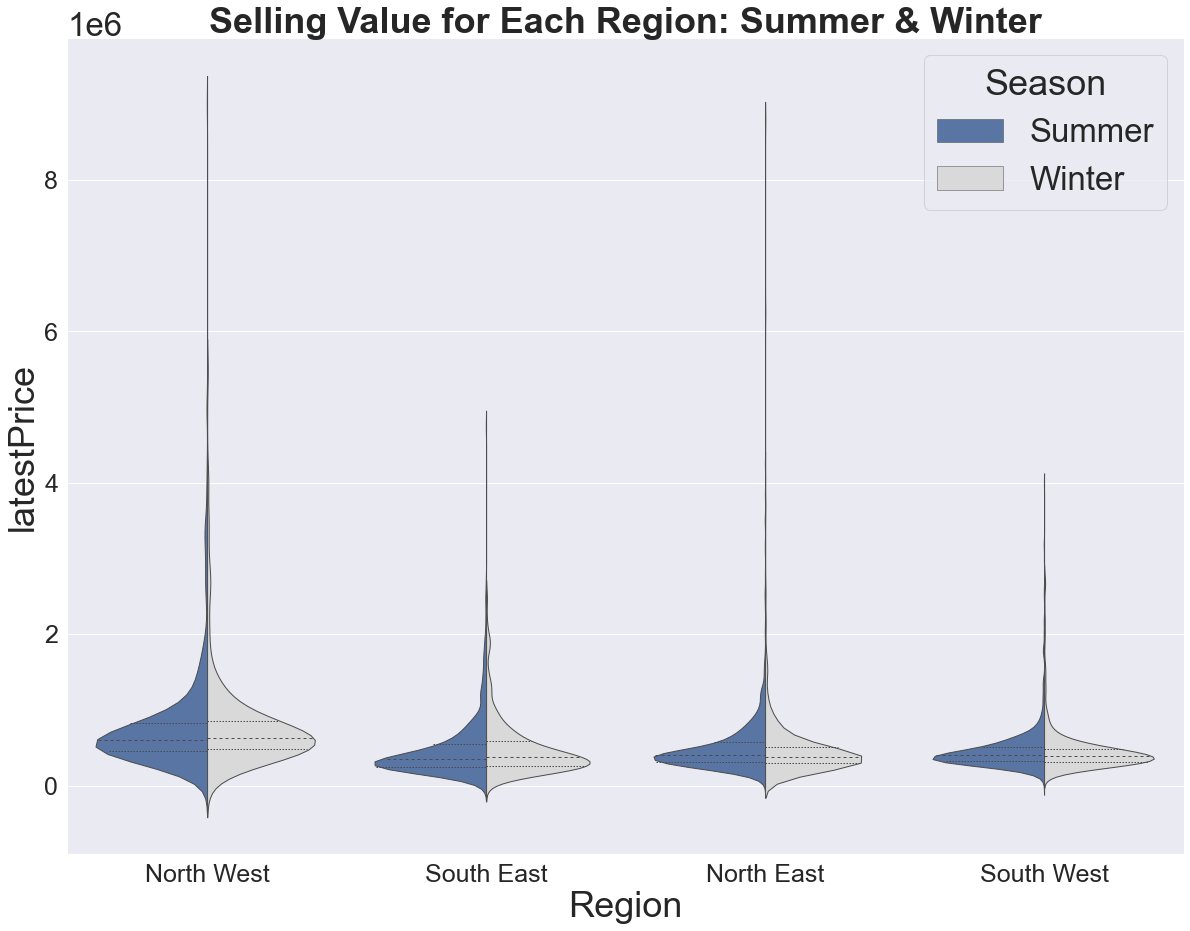

In [42]:


sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,15))
sns.set(font_scale=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=all_data, x="Region", y="latestPrice", hue="Season",
               split=True, inner="quart", linewidth=1,
               palette={"Summer": "b", "Winter": ".85"})
plt.title("Selling Value for Each Region: Summer & Winter", fontweight="bold")
sns.despine(left=True)

In [43]:
pyplot_price = mask5.groupby("latest_saleyear")["latestPrice"].mean().reset_index()
pyplot_price.rename(columns={"latest_saleyear": "Sale Year"}, inplace=True)
pyplot_price.rename(columns={"latestPrice": "Sold Price"}, inplace=True)
pyplot_price 


,Sale Year,Sold Price
0,2018,493487.982839
1,2019,501753.596477
2,2020,553603.038385


<Figure size 432x288 with 0 Axes>

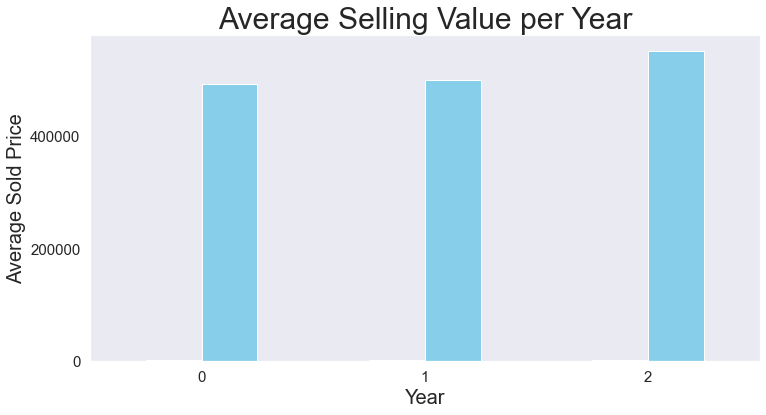

In [44]:
# making a bar graph to compare the average price sold for each year

plt.figure()
pyplot_price.plot(kind="bar", figsize=(12,6), color = "skyblue")
plt.gca().get_legend().remove()

plt.title("Average Selling Value per Year",fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Sold Price", fontsize=20)
plt.xticks(rotation = 0, fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()


In [45]:
texas = census_results.STNAME == "Texas"
texas_cities = census_results[texas]
texas_cities

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
2566,40,3,7,48,0,Texas,Texas,25145561,25146091,25241971,...,4.361336,7.456866,8.764683,7.132347,10.003069,10.644301,8.369711,6.510551,5.448428,6.618846
2567,50,3,7,48,1,Texas,Anderson County,58458,58452,58493,...,-1.797613,-0.838417,-4.705761,-0.948121,-0.069091,-2.719368,-0.920419,12.307586,0.344385,-1.244501
2568,50,3,7,48,3,Texas,Andrews County,14786,14786,14849,...,31.757272,26.327104,34.359023,27.490573,25.954288,23.319345,-26.433929,-20.003390,19.318246,32.519882
2569,50,3,7,48,5,Texas,Angelina County,86771,86771,86905,...,-1.993949,0.057405,-2.265368,-5.525652,-1.029283,-0.330680,-4.945559,-3.880083,-10.138661,-1.924795
2570,50,3,7,48,7,Texas,Aransas County,23158,23158,23181,...,10.520487,5.388279,13.883235,22.387429,28.480033,14.220314,18.213843,12.264114,-74.122609,10.051964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,50,3,7,48,499,Texas,Wood County,41964,41959,41977,...,13.870512,5.947496,11.364309,4.532096,14.028904,12.831709,19.201105,16.792401,24.849027,13.782306
2817,50,3,7,48,501,Texas,Yoakum County,7879,7879,7851,...,-2.774085,6.699532,2.495944,8.601094,9.025271,15.960568,-11.679001,-20.919286,-9.214440,2.774085
2818,50,3,7,48,503,Texas,Young County,18550,18550,18522,...,2.889210,-7.863980,-3.111948,3.930989,-0.764443,-4.446030,-1.820137,-4.608551,4.734321,3.389265
2819,50,3,7,48,505,Texas,Zapata County,14018,14018,14087,...,-4.659701,-6.781098,-10.174368,-6.210530,-14.742186,-7.066403,-15.204395,-21.811847,-16.758793,-5.295114


In [46]:
county_filter = ["Bastrop County", "Bexar County", "Caldwell County", "Comal County", "Guadalupe County","Hays County","Travis County", "Williamson County"]
county_filter

['Bastrop County',
 'Bexar County',
 'Caldwell County',
 'Comal County',
 'Guadalupe County',
 'Hays County',
 'Travis County',
 'Williamson County']

In [47]:
tx_counties = texas_cities.loc[texas_cities["CTYNAME"].isin(county_filter)]
tx_counties.POPESTIMATE2015.describe()


count    8.000000e+00
mean     5.220426e+05
std      6.702344e+05
min      4.041900e+04
25%      1.166250e+05
50%      1.726200e+05
75%      6.753010e+05
max      1.894834e+06
Name: POPESTIMATE2015, dtype: float64

In [48]:
cols = ["CTYNAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018", "POPESTIMATE2019"]
counties_df = tx_counties.loc[:, cols]
counties_df

# set index to county names
austin_counties = counties_df.set_index("CTYNAME")
austin_counties

# Finding the total population of all aunstin counties for each years.
austin_counties.loc['Total']= austin_counties.sum()
austin_counties

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
CTYNAME,,,,,,,,,,
Bastrop County,74371,75055,74749,75814,77737,80115,82591,84585,86595,88723
Bexar County,1722838,1755361,1788738,1821328,1858003,1894834,1927651,1956988,1981187,2003554
Caldwell County,38127,38470,38682,39201,39703,40419,41147,42328,43161,43664
Comal County,109306,112113,114873,118627,123214,128795,134343,140721,148141,156209
Guadalupe County,132587,135809,139641,142881,146811,150578,154492,159639,163276,166847
Hays County,158214,163270,168519,176035,184854,194662,204546,214726,222706,230191
Travis County,1030503,1061709,1096886,1122248,1152260,1179805,1206110,1227585,1246572,1273954
Williamson County,426287,442031,455750,470017,487913,507133,527622,546251,566463,590551
Total,3692233,3783818,3877838,3966151,4070495,4176341,4278502,4372823,4458101,4553693


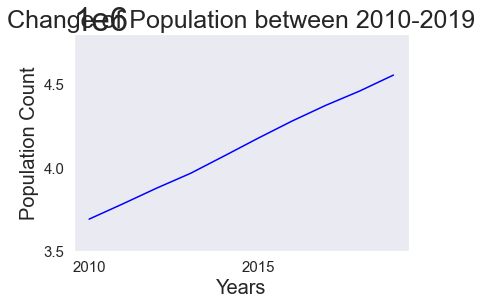

In [49]:
#creating line graph to show the change in population between 2010-2019

# Create the X and Y axis lists
time = np.arange(2010,2020,1)

pop = austin_counties.loc["Total"]

# Create a handle for each plot
population_change, = plt.plot(time, pop,color="blue")

# Add labels to X and Y axes : Add title
plt.title("Change of Population between 2010-2019", fontsize=25)
plt.xlabel("Years",fontsize=20 )
plt.ylabel("Population Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Set the limits for the Y axes
plt.ylim(3500000,4800000)

plt.grid()
plt.show()

In [50]:
# looking at the migration rate of each year

cols = ["CTYNAME","NETMIG2010","NETMIG2011","NETMIG2012","NETMIG2013","NETMIG2014","NETMIG2015","NETMIG2016","NETMIG2017","NETMIG2018","NETMIG2019"]
netmig_df = tx_counties.loc[:, cols]

# set index to county names
austin_county = netmig_df.set_index("CTYNAME")
austin_county

# Finding the total change of migration for all aunstin counties for each years.
austin_county.loc['Total']= austin_county.sum()
austin_county

,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,NETMIG2019
CTYNAME,,,,,,,,,,
Bastrop County,146,372,-542,789,1512,1968,2069,1574,1638,1761
Bexar County,4446,17673,18725,18267,21316,21627,17647,15251,11499,9832
Caldwell County,-3,141,64,329,367,519,517,1003,589,318
Comal County,615,2529,2433,3388,4118,5004,5086,6093,7168,7685
Guadalupe County,758,2431,2929,2434,3004,3006,3107,4392,2961,2887
Hays County,785,3768,3867,6107,7218,8108,8390,8764,6481,5963
Travis County,3124,20087,23490,14383,18534,16320,15383,11343,9745,18260
Williamson County,2489,11510,9550,10160,13522,15084,16575,14814,16635,20312
Total,12360,58511,60516,55857,69591,71636,68774,63234,56716,67018


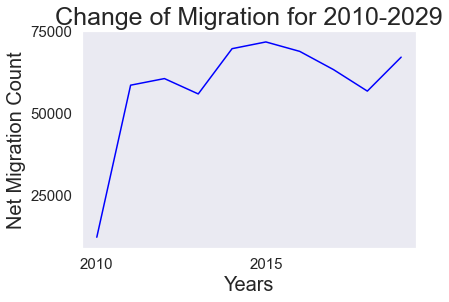

In [51]:
#creating a line graph to show the net migration of each year.
# positive net migration means shows that there is a higher ratio of immigration than emigrantion for that year.

# Create the X and Y axis lists
time = np.arange(2010,2020,1)

sum_migration = austin_county.loc["Total"]

# Create a handle for each plot
net_mirgation, = plt.plot(time, sum_migration,color="blue")

# Add labels to X and Y axes : Add title
plt.title("Change of Migration for 2010-2029",fontsize=25 )
plt.xlabel("Years",fontsize=20 )
plt.ylabel("Net Migration Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

# Set the limits for the Y axes
plt.ylim(9000,75000)

plt.show()

In [52]:
# looka at the natural balance of each year
# if there natural balance is a positive, there is a surplus of birth for that year compares to the death rate

cols = ["CTYNAME","NATURALINC2010","NATURALINC2011","NATURALINC2012","NATURALINC2013","NATURALINC2014","NATURALINC2015","NATURALINC2016","NATURALINC2017","NATURALINC2018","NATURALINC2019"]
natbal_df = tx_counties.loc[:, cols]

# set index to county names
austin_cnty = natbal_df.set_index("CTYNAME")
austin_cnty

# Finding the total change of migration for all aunstin counties for each years.
austin_cnty.loc['Total']= austin_cnty.sum()
austin_cnty

,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,NATURALINC2019
CTYNAME,,,,,,,,,,
Bastrop County,7,314,221,269,380,385,400,417,372,366
Bexar County,3425,14796,14457,14148,15185,15161,15171,14063,12685,12520
Caldwell County,76,202,153,192,139,196,210,176,245,186
Comal County,127,266,256,290,356,503,436,249,226,347
Guadalupe County,252,780,828,765,863,733,801,736,670,682
Hays County,262,1261,1251,1221,1359,1565,1437,1355,1471,1491
Travis County,2742,10972,10860,10705,11041,11052,10832,10067,9181,8951
Williamson County,1095,4160,3915,3920,4029,3933,3834,3750,3512,3676
Total,7986,32751,31941,31510,33352,33528,33121,30813,28362,28219


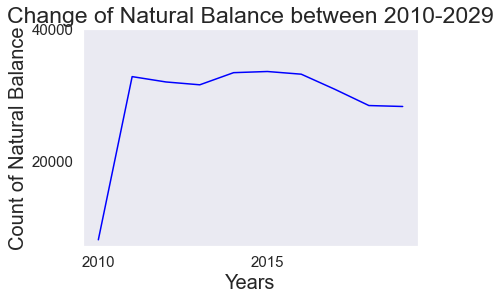

In [53]:
# Create the X and Y axis lists
time = np.arange(2010,2020,1)

net_bal = austin_cnty.loc["Total"]

# Create a handle for each plot
natural_bal, = plt.plot(time, net_bal,color="blue")

# Add labels to X and Y axes : Add title
plt.title("Change of Natural Balance between 2010-2029", fontsize=23)
plt.xlabel("Years",fontsize=20 )
plt.ylabel("Count of Natural Balance", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set the limits for the Y axes
plt.ylim(7000,40000)

plt.grid()
plt.show()
